<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [4]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [31]:
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                    
1                1      0         A/5 21171   7.2500        S  
2                1      0          PC 17599  71.2833        C  
3                0      0  STON/O2. 3101282   7.9250        S  
4                1      0            113803  53.1000        S  
5                0      0            373450   8.0500        S

In [7]:
train_df.describe(include='all')

Survived      Pclass                          Name   Sex  \
count   891.000000  891.000000                           891   891   
unique         NaN         NaN                           891     2   
top            NaN         NaN  Hoyt, Mr. Frederick Maxfield  male   
freq           NaN         NaN                             1   577   
mean      0.383838    2.308642                           NaN   NaN   
std       0.486592    0.836071                           NaN   NaN   
min       0.000000    1.000000                           NaN   NaN   
25%       0.000000    2.000000                           NaN   NaN   
50%       0.000000    3.000000                           NaN   NaN   
75%       1.000000    3.000000                           NaN   NaN   
max       1.000000    3.000000                           NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000          204   
unique         NaN         NaN         NaN       681         NaN          147   
top            NaN         NaN         NaN  CA. 2343         NaN  C23 C25 C27   
freq           NaN         NaN         NaN         7         NaN            4   
mean     29.699118    0.523008    0.381594       NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200          NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

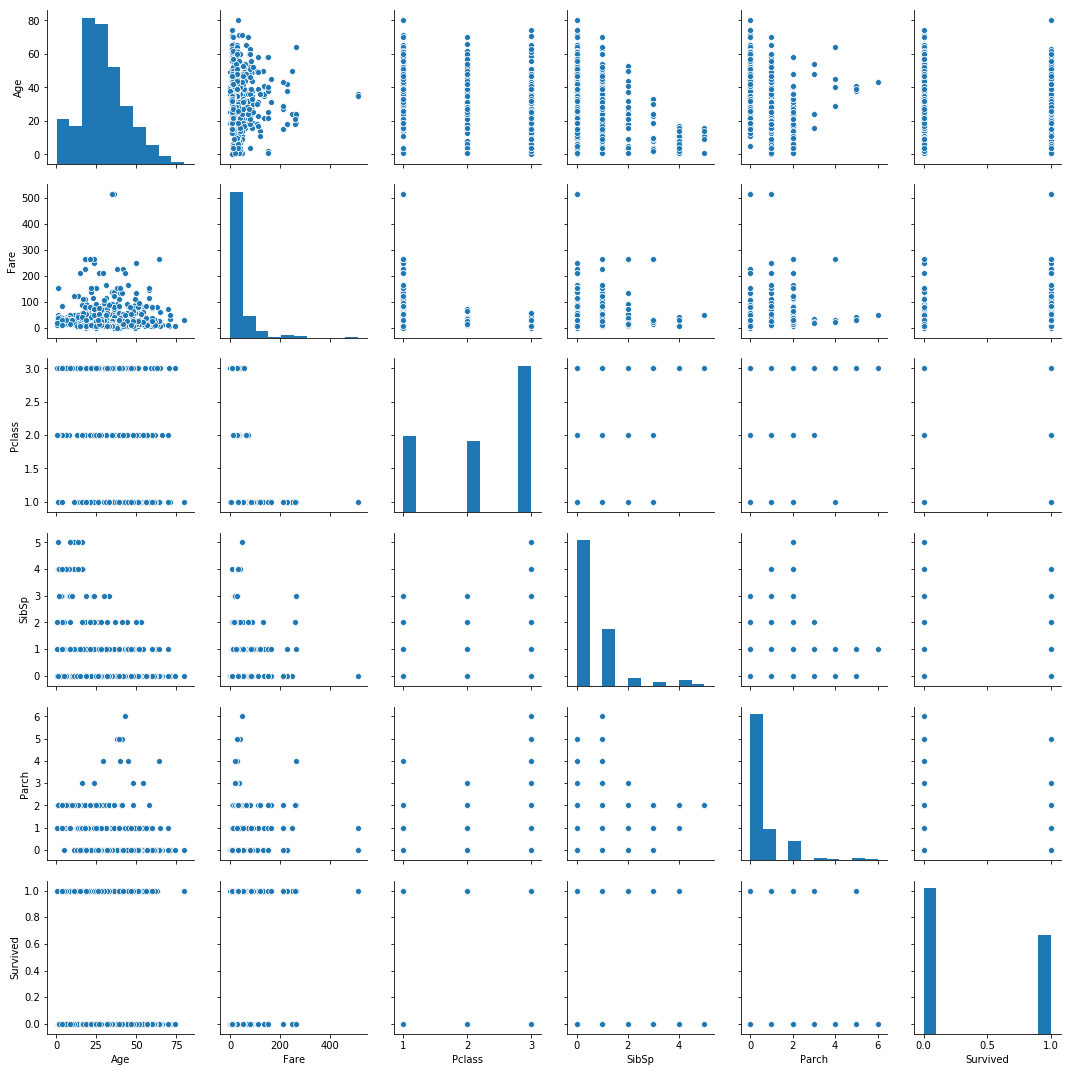

In [30]:
list_feature = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
sns.pairplot(train_df[list_feature])


**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

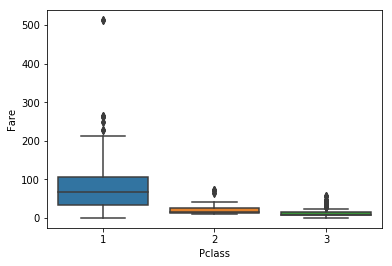

In [35]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

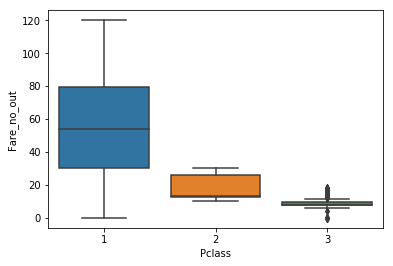

In [135]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[lambda d: d**2 < fare_pclass1.mean()**2 * 2]
fare_pclass2_no_out = fare_pclass2[lambda d: d**2 < fare_pclass2.mean()**2 * 2]
fare_pclass3_no_out = fare_pclass3[lambda d: d**2 < fare_pclass3.mean()**2 * 2]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df);

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

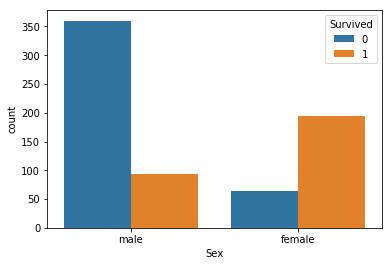

In [38]:
sns.countplot(hue='Survived', x='Sex', data=train_df);

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

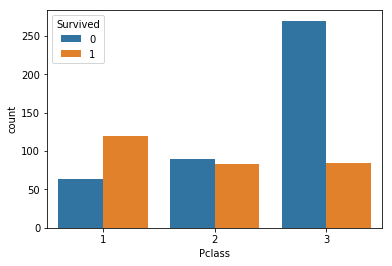

In [40]:
sns.countplot(x='Pclass', hue='Survived', data=train_df);

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

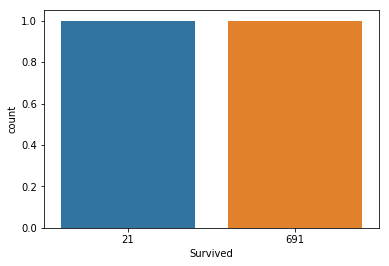

In [78]:
sns.countplot(x='Survived', hue='Survived', data=train_df.groupby(train_df['Age']>60).count());

In [79]:
train_df.groupby(train_df['Age']>60)['Survived'].count()

Age
False    691
True      21
Name: Survived, dtype: int64

In [51]:
train_df.groupby(train_df['Age']<30)['Survived'].count()

Age
False    328
True     384
Name: Survived, dtype: int64